<a href="https://colab.research.google.com/github/pemiran1/Ultimate-Technologies-Inc.-Take-Home-Challenge/blob/main/Ultimate_Technologies_Inc_Take_Home_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ultimate Technologies Inc. Take-Home Challenge**

Part 1 ‐ Exploratory data analysis

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

<ipython-input-1-3e4964cb37cf>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
from google.colab import files


uploaded = files.upload()

Saving logins.json to logins (1).json
Saving ultimate_data_challenge.json to ultimate_data_challenge.json


In [6]:
#Read File
file = 'logins.json'
f = open(file)
logins = json.loads(f.read())
f.close()

In [8]:
#create dataframe
df_logins = pd.DataFrame(pd.to_datetime(logins['login_time']),columns=['login_time'])
df_logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [9]:
df_logins[df_logins['login_time'].isna()].shape

(0, 1)

In [10]:
#Adding and Dropping Columns
df_logins['count'] = 1
df_logins.index = df_logins['login_time']
df_logins.drop('login_time',axis=1,inplace=True)
df_logins.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


<Axes: xlabel='login_time'>

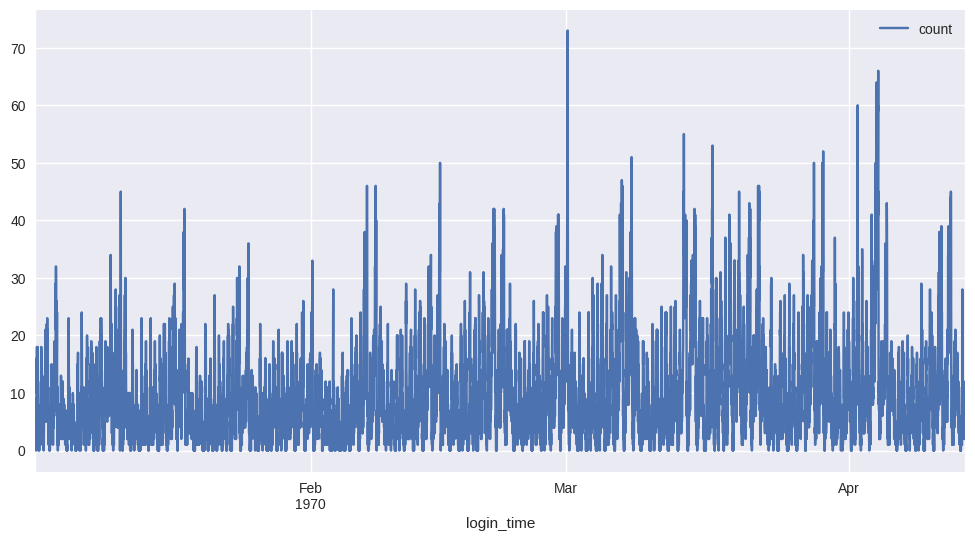

In [13]:
#Login_time Graph
df_count = df_logins.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

In [14]:
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [15]:
df_count = df_count.assign(month_day=df_count.index.day)
df_count = df_count.assign(weekday=df_count.index.weekday)
df_count.head(10)

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3
1970-01-01 21:15:00,4,1,3
1970-01-01 21:30:00,0,1,3
1970-01-01 21:45:00,4,1,3
1970-01-01 22:00:00,9,1,3


In [16]:
spikes = np.quantile(df_count,0.99)
df_spikes = df_count[df_count['count'] >= spikes]
month_days = []
weekdays = []
for date in df_spikes.index:
    month_days.append(date.day)
    weekdays.append(date.weekday())

df_spike_per_days = pd.DataFrame(month_days,columns=['day'],index=range(len(month_days)))
df_spike_per_weekdays = pd.DataFrame(weekdays,columns=['weekday'],index=range(len(weekdays)))

In [17]:

df_spike_per_days.day.value_counts()[0:10]

day
21    25
4     24
22    18
15    18
28    17
7     15
8     15
14    14
29    14
3     13
Name: count, dtype: int64

In [18]:
df_spike_per_weekdays.weekday.value_counts()

weekday
5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: count, dtype: int64

In [20]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [21]:
df_tripcounts = df['trips_in_first_30_days'].value_counts(normalize=True)*100
df_tripcounts.head(10)

trips_in_first_30_days
0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
7     1.638
8     1.178
9     0.942
Name: proportion, dtype: float64

In [23]:
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [25]:
df['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [26]:
df['avg_rating_of_driver'].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [28]:
#Filling Missing Values with mean and median
fill_val = (4.777861+5) / 2
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=fill_val)

df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [29]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
current_date = df['last_trip_date'].max()
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [30]:
#Create Dummy Variables
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()

#Drop Unuseful Columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

In [31]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std']})

avg_rating_by_driver          
                     median       std
active                               
0                       5.0  0.503901
1                       4.8  0.328753

In [32]:
pd.pivot_table(df,index='active',aggfunc={'trips_in_first_30_days':['mean','std']})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

In [34]:
df.active.value_counts(normalize=True)*100

active
0    62.35989
1    37.64011
Name: proportion, dtype: float64

In [35]:
#Import Libraries for Predictive Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [36]:
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [38]:
#Building Model
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.7498236064912811

In [39]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.75617128 0.74798387 0.75       0.74798387 0.74546371]
Mean Cross Validated Score: 0.7484119809864305


In [40]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300621
4,weekday_pct,0.131755
6,avg_rating_by_driver,0.114531
1,avg_rating_of_driver,0.080833
0,trips_in_first_30_days,0.080815
3,surge_pct,0.078890
2,avg_surge,0.066626
8,city_King's Landing,0.047293
11,phone_iPhone,0.019837
10,phone_Android,0.019404


In [41]:
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7499045920841295, 0.7498236064912811, 0.7498638198672711, None)

In [42]:
logit = LogisticRegression(solver='lbfgs')

param_grid = {'C':np.arange(0.5,5.1,0.1)}

grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [43]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7424653652392947


In conclusion, both models have almost the same accuracy of ~75%, with RandomForest Model having slightly higher. Either model would be appropriate to use.